In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [48]:
from sklearn.datasets import make_classification

X,y = make_classification(n_features=1, n_samples=25, n_informative=1, n_redundant=0, random_state=11, n_clusters_per_class=1,
                           class_sep=0.4)
X.mean(axis=0), X.std(axis=0)

(array([-0.19820608]), array([0.87333629]))

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X.mean(axis=0), X.std(axis=0)

(array([1.77635684e-17]), array([1.]))

(-3.0, 2.0)

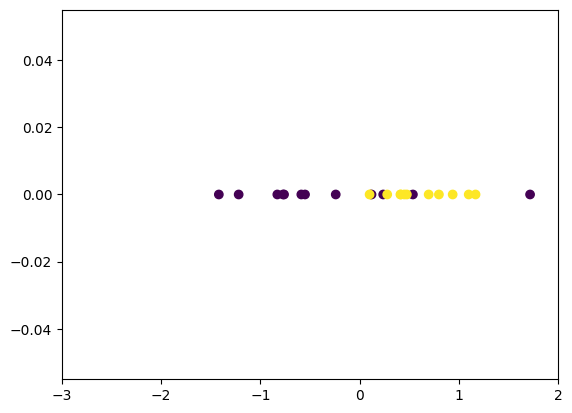

In [61]:
plt.scatter(X, np.zeros(X.shape[0]), c=y)
plt.xlim(-3,2)

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [63]:
model.fit(X, y)

LogisticRegression()

In [64]:
model.coef_

array([[1.34494091]])

In [65]:
model.intercept_

array([-0.19801197])

In [73]:
a = model.coef_[0] 
b = model.intercept_ 

In [77]:
x = np.linspace(-3,3)
model_y = a*x + b

array([-4.23283471, -4.06814806, -3.90346142, -3.73877478, -3.57408814,
       -3.40940149, -3.24471485, -3.08002821, -2.91534157, -2.75065492,
       -2.58596828, -2.42128164, -2.256595  , -2.09190835, -1.92722171,
       -1.76253507, -1.59784843, -1.43316178, -1.26847514, -1.1037885 ,
       -0.93910186, -0.77441521, -0.60972857, -0.44504193, -0.28035529,
       -0.11566865,  0.049018  ,  0.21370464,  0.37839128,  0.54307792,
        0.70776457,  0.87245121,  1.03713785,  1.20182449,  1.36651114,
        1.53119778,  1.69588442,  1.86057106,  2.02525771,  2.18994435,
        2.35463099,  2.51931763,  2.68400428,  2.84869092,  3.01337756,
        3.1780642 ,  3.34275085,  3.50743749,  3.67212413,  3.83681077])

(-1.0, 1.0)

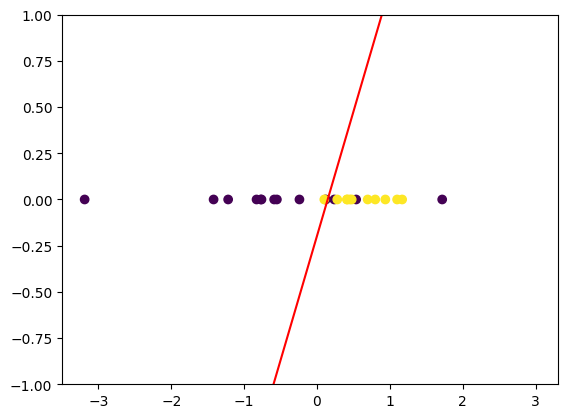

In [82]:
plt.plot(x, model_y, c='red')
plt.scatter(X, np.zeros(X.shape[0]), c=y) 
plt.ylim(-1,1)
 

In [83]:
model.score(X, y)

0.8

In [84]:
y_pred = model.predict(X)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1])

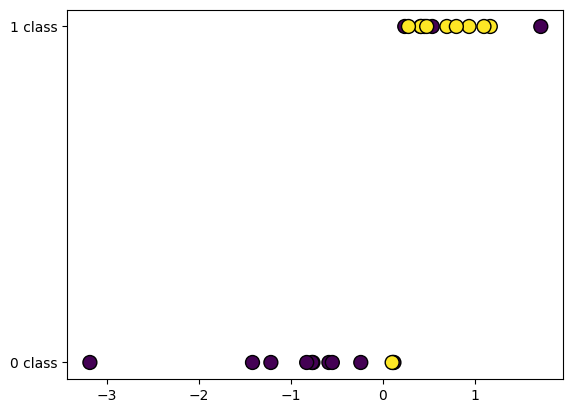

In [90]:
plt.scatter(X, y_pred, c=y, s=100, edgecolors='black')
plt.yticks(np.arange(0, 2), ['0 class', '1 class'])
plt.show()

In [100]:
pred_proba = model.predict_proba(X)
pred_proba[:5]

array([[0.77239413, 0.22760587],
       [0.89149162, 0.10850838],
       [0.39916463, 0.60083537],
       [0.77471304, 0.22528696],
       [0.46944768, 0.53055232]])

In [115]:
X

array([[-0.76127322],
       [-1.41869179],
       [ 0.45129046],
       [-0.77111621],
       [ 0.23820651],
       [ 1.71873313],
       [ 0.41169756],
       [-0.82914259],
       [ 0.11046641],
       [ 0.69649121],
       [ 0.53760054],
       [-0.587295  ],
       [-3.1882251 ],
       [ 0.12046015],
       [ 1.16915177],
       [ 0.41580869],
       [-0.2402943 ],
       [ 0.93843451],
       [ 1.10014328],
       [ 0.10098614],
       [-1.21878863],
       [ 0.27863321],
       [ 0.79977834],
       [-0.54989369],
       [ 0.47683863]])

In [116]:
pred_proba

array([[0.77239413, 0.22760587],
       [0.89149162, 0.10850838],
       [0.39916463, 0.60083537],
       [0.77471304, 0.22528696],
       [0.46944768, 0.53055232],
       [0.10778366, 0.89221634],
       [0.41200162, 0.58799838],
       [0.78804142, 0.21195858],
       [0.51235777, 0.48764223],
       [0.32328245, 0.67671755],
       [0.37167704, 0.62832296],
       [0.72867077, 0.27132923],
       [0.98885973, 0.01114027],
       [0.50899908, 0.49100092],
       [0.20190536, 0.79809464],
       [0.41066278, 0.58933722],
       [0.62742683, 0.37257317],
       [0.25652157, 0.74347843],
       [0.21727531, 0.78272469],
       [0.51554288, 0.48445712],
       [0.86261848, 0.13738152],
       [0.45593134, 0.54406866],
       [0.29366652, 0.70633348],
       [0.71861188, 0.28138812],
       [0.39095306, 0.60904694]])

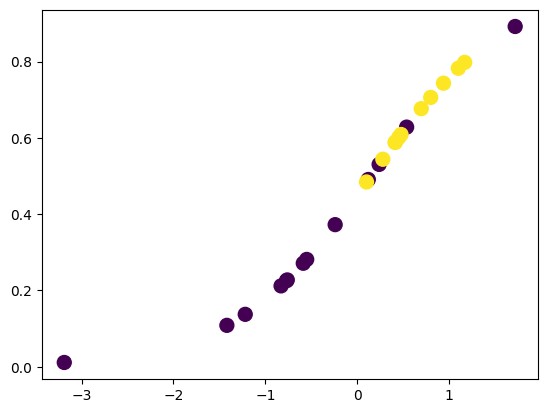

In [118]:
plt.scatter(X, pred_proba[:, 1], c=y, s=100)

In [119]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

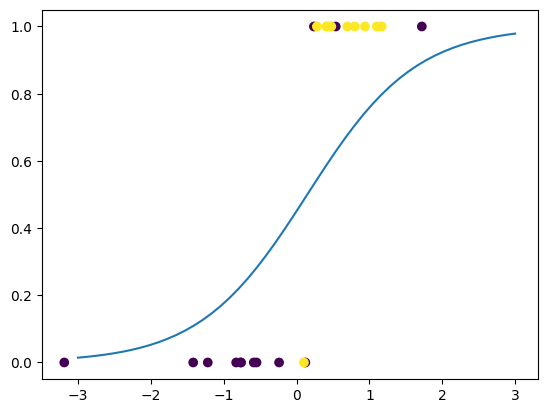

In [121]:
model_sigm = a*x+b
plt.scatter(X, y_pred, c=y)
plt.plot(x, sigmoid(model_sigm))

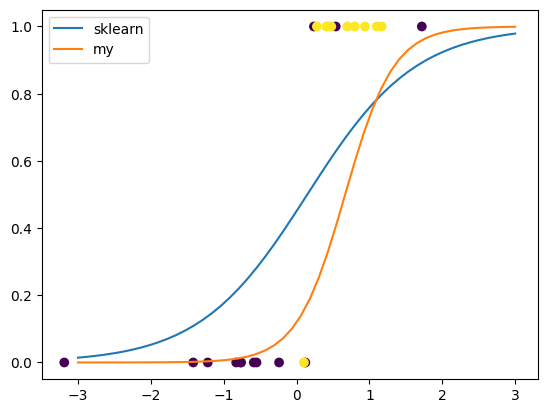

In [126]:
model_my = 3*x-2
plt.plot(x, sigmoid(model_sigm), label='sklearn')
plt.scatter(X, y_pred, c=y)
plt.plot(x, sigmoid(model_my), label='my')
plt.legend();

In [135]:
X.shape

(25, 1)

In [141]:
df = pd.DataFrame({
    'X': np.squeeze(X),
    'y':y,
    'sig_sk': sigmoid(np.squeeze(a*X+b)),
    'sig_my': sigmoid(np.squeeze(3*X-2)),
})
df['sk_class'] = (df['sig_sk']>0.5).astype('int')
df['my_class'] = (df['sig_my']>0.5).astype('int')
df.head()

,X,y,sig_sk,sig_my,sk_class,my_class
0,-0.761273,0,0.227606,0.013602,0,0
1,-1.418692,0,0.108508,0.001915,0,0
2,0.451290,1,0.600835,0.343862,1,0
3,-0.771116,0,0.225287,0.013212,0,0
4,0.238207,0,0.530552,0.216636,1,0
